##<font color='Gold'> **A1: INTRODUCTION TO GOOGLE COLAB & IMAGE SEGMENTATION**
</font>

###<font color='Green'> **LINK GOOGLE DRIVE**
</font>


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <font color='Green'>**SAM : SEGMENT ANYTHING MODEL | FACEBOOK**
</font>

[SEGMENT ANYTHING MODEL](https://segment-anything.com/)

## <font color='Green'> **[** **LANG SAM MODEL** **]** : Language based segmentation
</font>





###<font color='Green'> **[** Setup Environment **]**
</font>



In [ ]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver

In [ ]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [ ]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


###<font color='Green'> **[** Import Image **]**
</font>



<font color='orange'>  <<<<<<<<<<<<<< **UPDATE DRIVE LINK** >>>>>>>>>>>>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open('/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/2009/5.png')

# Display the image
plt.imshow(np.array(image))
plt.axis('off')  # Turn off axis labels
plt.show()

###<font color='Green'> **[** Set Language Prompt  **]**


<font color='orange'>  <<<<<<<<<<<<<< **CHANGE THE PROMPT TO EXPLORE OPTIONS** >>>>>>>>>>>>


In [ ]:
text_prompt = "building"

<font color='orange'>  <<<<<<<<<<<<<< **CHANGE THE THRESHOLD TO EXPLORE OPTIONS** >>>>>>>>>>>>


In [ ]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

###<font color='Green'> **[** Segmentation **]**
</font>



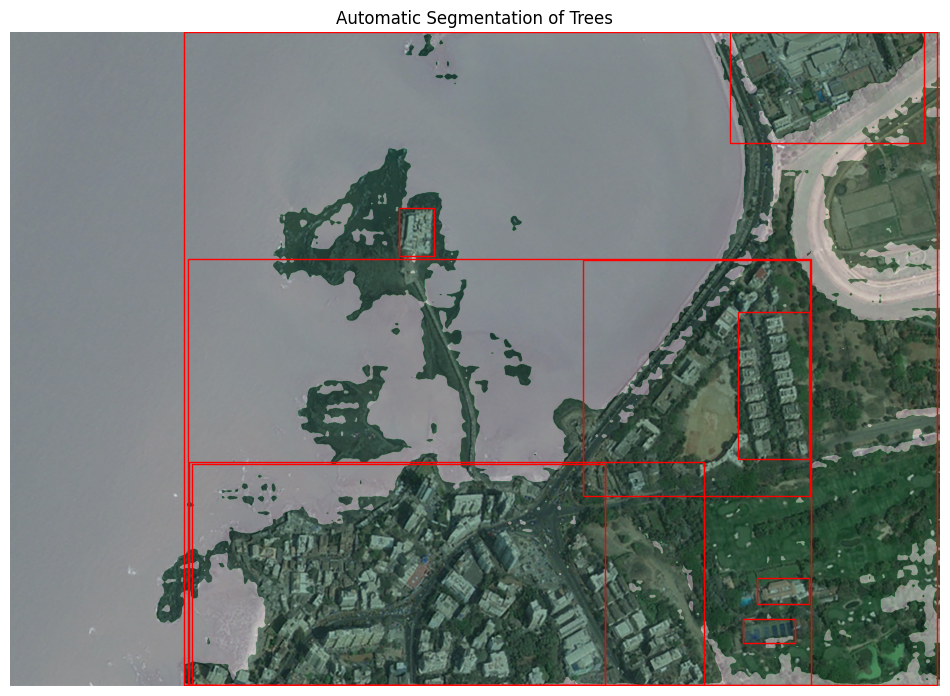

In [ ]:
sam.show_anns(
    cmap='Greens',
    box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True,
)

# <font color='Green'> **[** **SAM MODEL** **]** : Selection Based Segmentation with K-means Model
</font>

#<font color='gold'> **A2: MACHINE LEARNING MODELS**
</font>

##<font color='Green'> **[** Setup Environment **]**
</font>




In [ ]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

In [ ]:
using_colab = True

In [ ]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth





##<font color='Green'> **[** Import Libraries **]**
</font>

In [ ]:
!pip install Pillow
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

##<font color='Green'>  **[** Extracting Points | Boxes | Masks **]**
</font>

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


##<font color='Green'>  **[** Load Satellite Images **]**
</font>

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE DRIVE LINK** >>>>>>>>>>>>

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE YEARS** >>>>>>>>>>>>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open the first image file
img1 = Image.open('/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/2009/5.png')

# Open the second image file
img2 = Image.open('/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/2024/5.png')

# Convert the images to numpy arrays
img_array1 = np.array(img1)
img_array2 = np.array(img2)

# Display the images side by side using matplotlib
plt.figure(figsize=(22, 10))

# Display the first image
plt.subplot(1, 2, 1)
plt.imshow(img_array1)
plt.title('2009')
plt.axis('on')

# Display the second image
plt.subplot(1, 2, 2)
plt.imshow(img_array2)
plt.title('2020')
plt.axis('on')

plt.show()



##<font color='Green'>  **[** Visualize Change **]**
</font>

In [ ]:
%pip install -U leafmap
import leafmap

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE LABELS** >>>>>>>>>>>>

In [ ]:
leafmap.image_comparison(
    img1,
    img2,
    label1="2009",
    label2="2023",
    starting_position=50,
    out_html="image_comparison.html",
)

#<font color='gold'> **A3: NEIGHBOURHOOD MAPPING**
</font>

#<font color='Green'>  **[ Segmenting Images ]**
</font>

###<font color='Green'>  **[ Activate SAM ]**
</font>

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device='cpu')
# sam.to(device=device)

predictor = SamPredictor(sam)

##<font color='Green'>  **[ SAM PREDICTOR : IMAGE_1 ]**
</font>

In [ ]:
predictor.set_image(img_array1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_points(points, labels, ax):
    for point, label in zip(points, labels):
        ax.scatter(point[0], point[1], c='r' if label == 1 else 'b', label=f'Label {label}')
    ax.legend()

###<font color='Green'>  **[ Set point on image ]**
</font>

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE POINT CORDINATES** >>>>>>>>>>>>

In [ ]:
input_point1 = np.array([[300, 150]])
input_label1 = np.array([1])

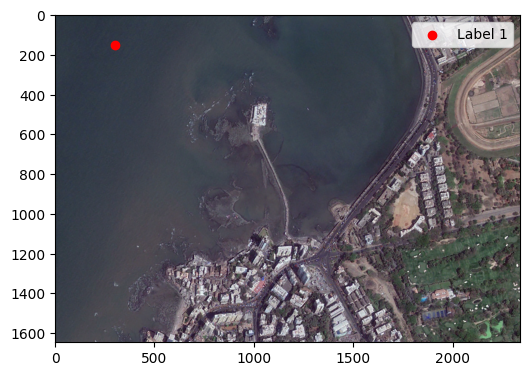

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img_array1)  # Assuming img_array is defined elsewhere in your code
show_points(input_point1, input_label1, plt.gca())
plt.axis('on')
plt.show()

###<font color='Green'>  **[ Mask Generation ]**
</font>

In [ ]:
masks1, scores1, logits1 = predictor.predict(
    point_coords=input_point1,
    point_labels=input_label1,
    multimask_output=True,
)

In [ ]:
for i in range(3):
    m1 = masks1[i]
    s1 = scores1[i]

    plt.figure(figsize=(6,6))
    plt.imshow(img_array1)
    show_mask(m1, plt.gca())
    show_points(input_point1, input_label1, plt.gca())
    plt.title(f"Mask {i+1}, Score: {s1:.2f}", fontsize=18)
    plt.axis('off')
    plt.show()

###<font color='Green'>  **[ K - Means Model ]**
</font>

In [ ]:
!pip install scikit-learn
!pip install rasterio

<font color='orange'>  <<<<<<<<<<<<<< **CHANGE SLIDER TO SPECIFY NUMBER OF CLUSTERS** >>>>>>>>>>>>

In [ ]:
import matplotlib.pyplot as plt
import rasterio

from sklearn.cluster import KMeans

# Reshape the image array to a 2D array of pixels
pixels = img_array1.reshape(-1, img_array1.shape[-1])

# Apply k-means clustering to the pixels
n_clusters = 4  # You can adjust this parameter to change the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(pixels)

# Get the labels assigned to each pixel by the clustering algorithm
labels = kmeans.labels_

# Reshape the labels back into the original image shape
label_image1 = labels.reshape(img_array1.shape[:2])


# Define colors for each cluster label
cluster_colors = ['Black', 'Blue', 'Green', 'yellow']  # Add more colors if needed

# Map labels to colors
colored_image1 = plt.cm.colors.ListedColormap(cluster_colors)(label_image1)

# Plot the resulting segmented image with specified colors
plt.figure(figsize=(10, 10))
plt.imshow(colored_image1)
plt.axis('off')
plt.show()


###<font color='Green'>  **[ Save Image ]**
</font>

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE DRIVE LINK** >>>>>>>>>>>>

In [ ]:
# Save the resulting segmented image
output_path = '/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/Code_Outputs/5_2009.png'  # You can change the file extension and name as needed
plt.imsave(output_path, colored_image1)

###<font color='Green'>  **[ Save Geolocated file : Tiff ]**
</font>

In [ ]:
import rasterio
from rasterio.transform import from_bounds
from rasterio.crs import CRS

# Define the GeoTIFF file path and metadata
output_path = '/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/Code_Outputs/G_5_2009.tiff'  # Replace with your desired file path
xmin, ymin, xmax, ymax = 72.802115,18.975282,72.817995,18.986232


width, height = label_image1.shape[1], label_image1.shape[0]
transform = from_bounds(xmin, ymin, xmax, ymax, width, height)

# Specify the CRS using EPSG code 4326 (WGS84)
crs = CRS.from_epsg(4326)

# Write the label image as a GeoTIFF with specified CRS
with rasterio.open(output_path, 'w', driver='GTiff', dtype=rasterio.uint8, count=1,
                   width=width, height=height, transform=transform, crs=crs) as dst:
    dst.write(label_image1.astype(rasterio.uint8), 1)


##<font color='Green'>  **[ SAM PREDICTOR : IMAGE_2 ]**
</font>

In [ ]:
predictor.set_image(img_array2)

###<font color='Green'>  **[ Set point on image ]**
</font>

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE POINT CORDINATES** >>>>>>>>>>>>

In [ ]:
input_point2 = np.array([[300, 150]])
input_label2 = np.array([2])

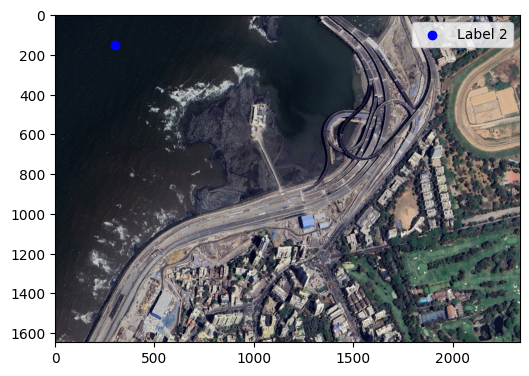

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img_array2)  # Assuming img_array is defined elsewhere in your code
show_points(input_point2, input_label2, plt.gca())
plt.axis('on')
plt.show()

###<font color='Green'>  **[ Mask Generation ]**
</font>

In [ ]:
masks2, scores2, logits2 = predictor.predict(
    point_coords=input_point2,
    point_labels=input_label2,
    multimask_output=True,
)

In [ ]:
for f in range(3):
    m2 = masks2[f]
    s2 = scores2[f]

    plt.figure(figsize=(6,6))
    plt.imshow(img_array2)
    show_mask(m2, plt.gca())
    show_points(input_point2, input_label2, plt.gca())
    plt.title(f"Mask {f+1}, Score: {s2:.2f}", fontsize=18)
    plt.axis('off')
    plt.show()

###<font color='Green'>  **[ K - Means Model ]**
</font>

<font color='orange'>  <<<<<<<<<<<<<< **CHANGE SLIDER TO SPECIFY NUMBER OF CLUSTERS** >>>>>>>>>>>>

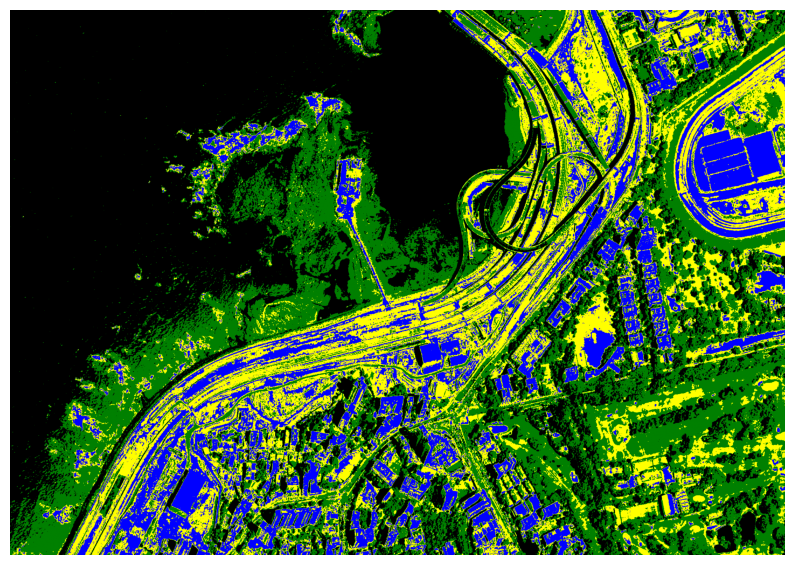

In [ ]:
!pip install scikit-learn
!pip install rasterio
import matplotlib.pyplot as plt
import rasterio

from sklearn.cluster import KMeans

# Reshape the image array to a 2D array of pixels
pixels = img_array2.reshape(-1, img_array2.shape[-1])

# Apply k-means clustering to the pixels
n_clusters = 4  # You can adjust this parameter to change the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(pixels)

# Get the labels assigned to each pixel by the clustering algorithm
labels = kmeans.labels_

# Reshape the labels back into the original image shape
label_image2 = labels.reshape(img_array2.shape[:2])


# Define colors for each cluster label
cluster_colors = ['Black', 'Blue', 'Green', 'yellow']  # Add more colors if needed

# Map labels to colors
colored_image2 = plt.cm.colors.ListedColormap(cluster_colors)(label_image2)

# Plot the resulting segmented image with specified colors
plt.figure(figsize=(10, 10))
plt.imshow(colored_image2)
plt.axis('off')
plt.show()

###<font color='Green'>  **[ Save Image ]**
</font>

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE DRIVE LINK** >>>>>>>>>>>>

In [ ]:
# Save the resulting segmented image
output_path = '/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/Code_Outputs/5_2024.png'  # You can change the file extension and name as needed
plt.imsave(output_path, colored_image2)

###<font color='Green'>  **[ Save Geolocated file : Tiff ]**
</font>

In [ ]:
import rasterio
from rasterio.transform import from_bounds
from rasterio.crs import CRS

# Define the GeoTIFF file path and metadata
output_path = '/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/Code_Outputs/G_5_2024.tiff'  # Replace with your desired file path
xmin, ymin, xmax, ymax =  72.802115,18.975282,72.817995,18.986232



width, height = label_image2.shape[1], label_image2.shape[0]
transform = from_bounds(xmin, ymin, xmax, ymax, width, height)

# Specify the CRS using EPSG code 4326 (WGS84)
crs = CRS.from_epsg(4326)

# Write the label image as a GeoTIFF with specified CRS
with rasterio.open(output_path, 'w', driver='GTiff', dtype=rasterio.uint8, count=1,
                   width=width, height=height, transform=transform, crs=crs) as dst:
    dst.write(label_image2.astype(rasterio.uint8), 1)

##<font color='Green'>  **[ Compare Segmentation ]**
</font>

In [ ]:
%pip install -U leafmap
import leafmap

<font color='orange'>  <<<<<<<<<<<<<< **UPDATE DRIVE LINK** >>>>>>>>>>>>

In [ ]:
# Assuming label_image1 and label_image2 are the paths to your image files
img2023 = "/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/Code_Outputs/5_2024.png"
img2009 = "/content/drive/MyDrive/College_Workshops/CITY.AI/Satalite_Imagery/Code_Outputs/5_2009.png"

leafmap.image_comparison(
    img2023,
    img2009,
    label1="Satellite Image",
    label2="Image Segmentation",
    starting_position=50,
    out_html="image_comparison.html",
)
